# importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings("ignore")

# reading the csv file

In [3]:
df = pd.read_csv('data_car.csv')

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


### Checking the types of data, statistical summary, shape, null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [8]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [9]:
df.shape

(11914, 16)

In [10]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

## Pre-processing

## Dropping irrelevant columns

In [11]:
#Dropping the uneccessary Columns
#Choosing from these : ['Engine Fuel Type', 'Vehicle Style','Market Category', 'Popularity', 'Number of Doors', 'Vehicle Size']

df = df.drop(['Market Category' , 'Number of Doors','Engine Fuel Type'] , axis = 1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


### Rename the columns "Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"

In [12]:
#Renaming the Columns
df= df.rename(columns={'Engine HP': 'HP', 'Engine Cylinders': 'Cylinders', 'Transmission Type': 'Transmission', 'Driven_Wheels': 'Drive Mode', 'highway MPG': 'MPG-H', 'city mpg': 'MPG-C', 'MSRP': 'Price' })
df.head(5)
     

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


### Dropping the duplicate rows

In [13]:
# Total number of rows and columns
df.shape

(11914, 13)

In [14]:
# Rows containing duplicate data
duplicate_rows_df= df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)
print()
print(duplicate_rows_df)

number of duplicate rows:  (792, 13)

         Make     Model  Year     HP  Cylinders Transmission  \
14        BMW  1 Series  2013  230.0        6.0       MANUAL   
18       Audi       100  1992  172.0        6.0       MANUAL   
20       Audi       100  1992  172.0        6.0       MANUAL   
24       Audi       100  1993  172.0        6.0       MANUAL   
25       Audi       100  1993  172.0        6.0       MANUAL   
...       ...       ...   ...    ...        ...          ...   
11481  Suzuki      X-90  1998   95.0        4.0       MANUAL   
11603   Volvo      XC60  2017  302.0        4.0    AUTOMATIC   
11604   Volvo      XC60  2017  240.0        4.0    AUTOMATIC   
11708  Suzuki       XL7  2008  252.0        6.0    AUTOMATIC   
11717  Suzuki       XL7  2008  252.0        6.0    AUTOMATIC   

              Drive Mode Vehicle Size Vehicle Style  MPG-H  MPG-C  Popularity  \
14      rear wheel drive      Compact         Coupe     28     19        3916   
18     front wheel drive      M

In [15]:
# Used to count the number of rows before removing the data
df.count() 

Make             11914
Model            11914
Year             11914
HP               11845
Cylinders        11884
Transmission     11914
Drive Mode       11914
Vehicle Size     11914
Vehicle Style    11914
MPG-H            11914
MPG-C            11914
Popularity       11914
Price            11914
dtype: int64

#### So seen above there are 11914 rows and we are removing 989 rows of duplicate data.

In [16]:
# Dropping the duplicates 
df = df.drop_duplicates()
df.head(5)
     

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [17]:
df.shape

(11122, 13)

In [18]:
# Counting the number of rows after removing duplicates.
df.count()

Make             11122
Model            11122
Year             11122
HP               11053
Cylinders        11092
Transmission     11122
Drive Mode       11122
Vehicle Size     11122
Vehicle Style    11122
MPG-H            11122
MPG-C            11122
Popularity       11122
Price            11122
dtype: int64

### Dropping the missing or null values

In [19]:
# Finding the null values.
print(df.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


In [20]:
# Dropping the missing values.
df = df.dropna() 
df.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

#### Now we have removed all the rows which contain the Null or N/A values (Cylinders and Horsepower (HP))

In [21]:
# After dropping the values
print(df.isnull().sum()) 

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


### EDA

### Plotting graphs of various columns to check outliers

<AxesSubplot:xlabel='Price'>

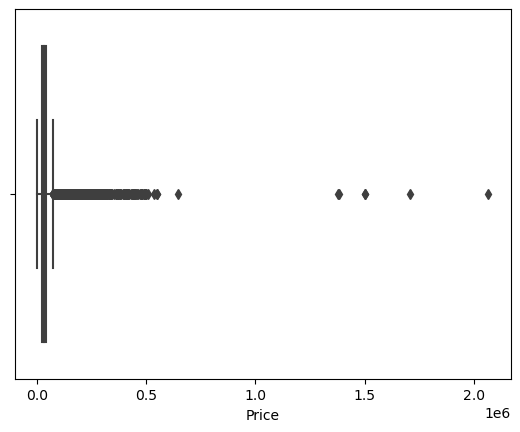

In [22]:
#Plotting Graphs of Data(Columns)
sns.boxplot(x=df['Price'])

<AxesSubplot:xlabel='HP'>

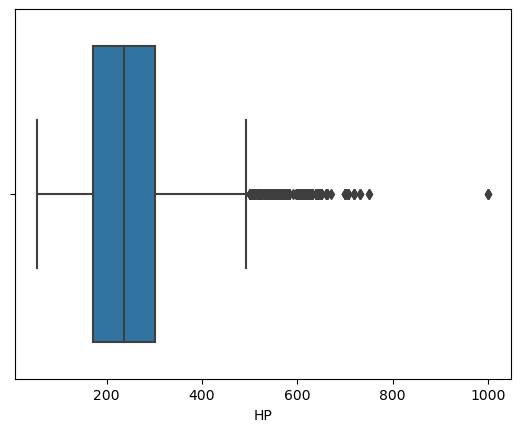

In [23]:
sns.boxplot(x=df['HP'])

<AxesSubplot:xlabel='Cylinders'>

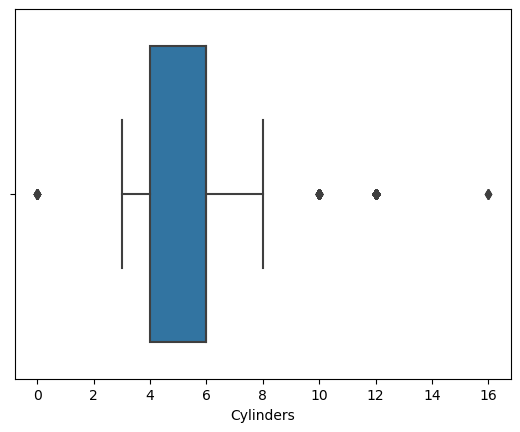

In [24]:
sns.boxplot(x=df['Cylinders'])

<AxesSubplot:xlabel='MPG-C'>

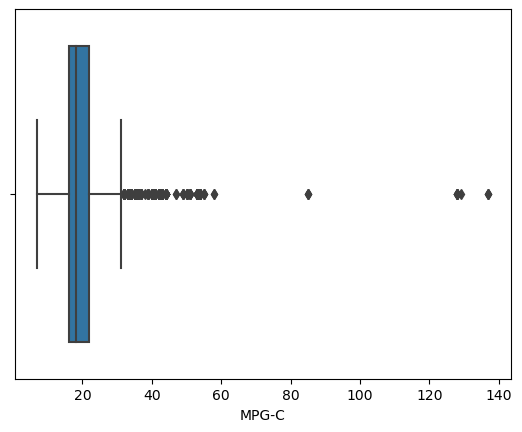

In [25]:
sns.boxplot(x=df['MPG-C'])
     

<AxesSubplot:xlabel='MPG-H'>

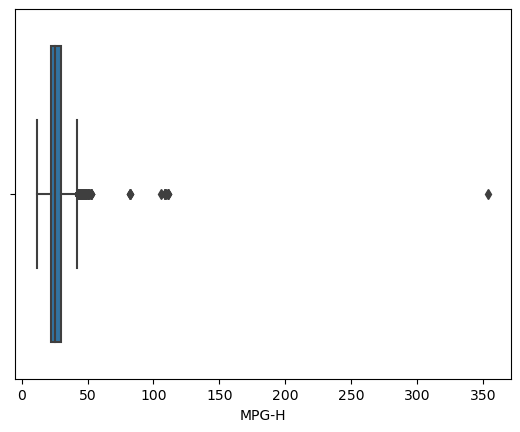

In [26]:
sns.boxplot(x=df['MPG-H'])

<AxesSubplot:xlabel='Popularity'>

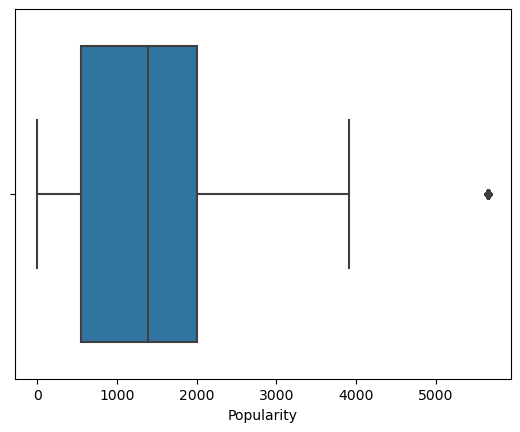

In [27]:
sns.boxplot(x=df['Popularity'])

### Check for outliers

<AxesSubplot:xlabel='Price'>

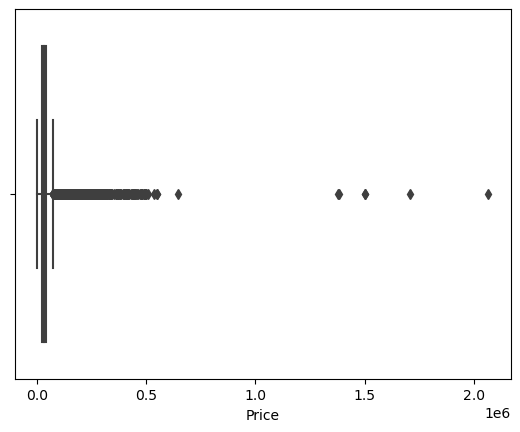

In [28]:
sns.boxplot(x=df['Price'])

<AxesSubplot:xlabel='HP'>

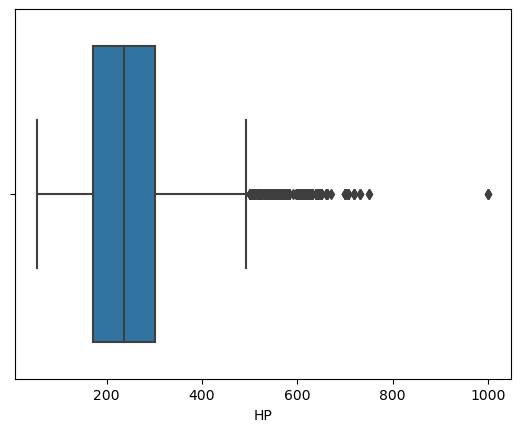

In [29]:
sns.boxplot(x=df['HP'])

<AxesSubplot:xlabel='Cylinders'>

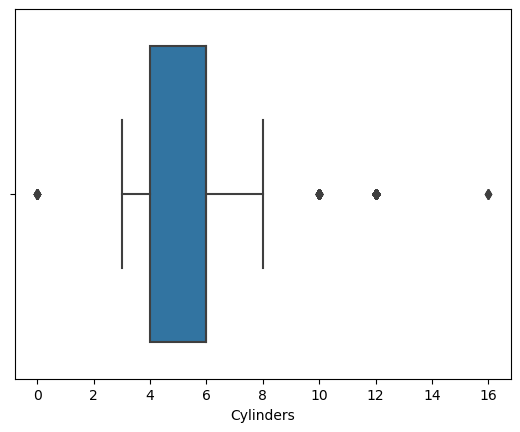

In [30]:
sns.boxplot(x=df['Cylinders'])

In [31]:
#Finding IQR
Q1 = df.quantile(0.25)
Q3 =df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
     

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


In [32]:
#Removing Outliers
df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape
     

(8546, 13)

<AxesSubplot:xlabel='Price'>

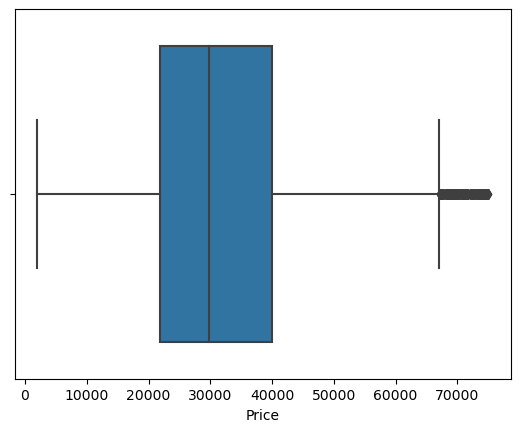

In [33]:
sns.boxplot(x=df['Price'])

### Top 10 car brands are the most represented in the dataset

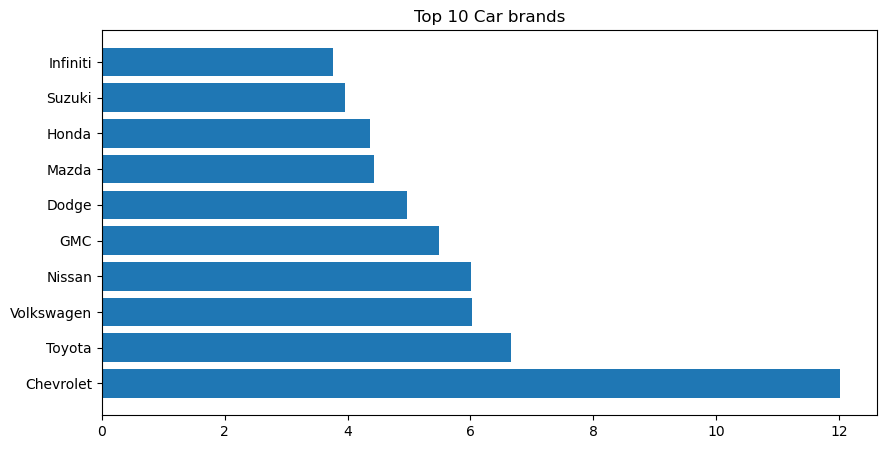

In [34]:

# Percentage of car per brand
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())

# Top 10 car brands
popular_labels = counts.index[:10]
    
# Plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=counts[:10])
plt.title('Top 10 Car brands')
plt.show()

### The average price among the top car brands

In [35]:
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)
     

                   Price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


### The correlation matrix

In [36]:

df.corr()
     

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


#### Insights

High correlation between:
Cylinders & HP
Highway mpg & City mpg
The relationship : More the cylinders there are, more powerful the car is

High anticorrelation:

Cylinders & highway mpg
The relationship : Highway mpg / Engine Cylinders have a strong negative correlation with highway and city MPG because lower MPG figures mean higher fuel consumption.



<AxesSubplot:>

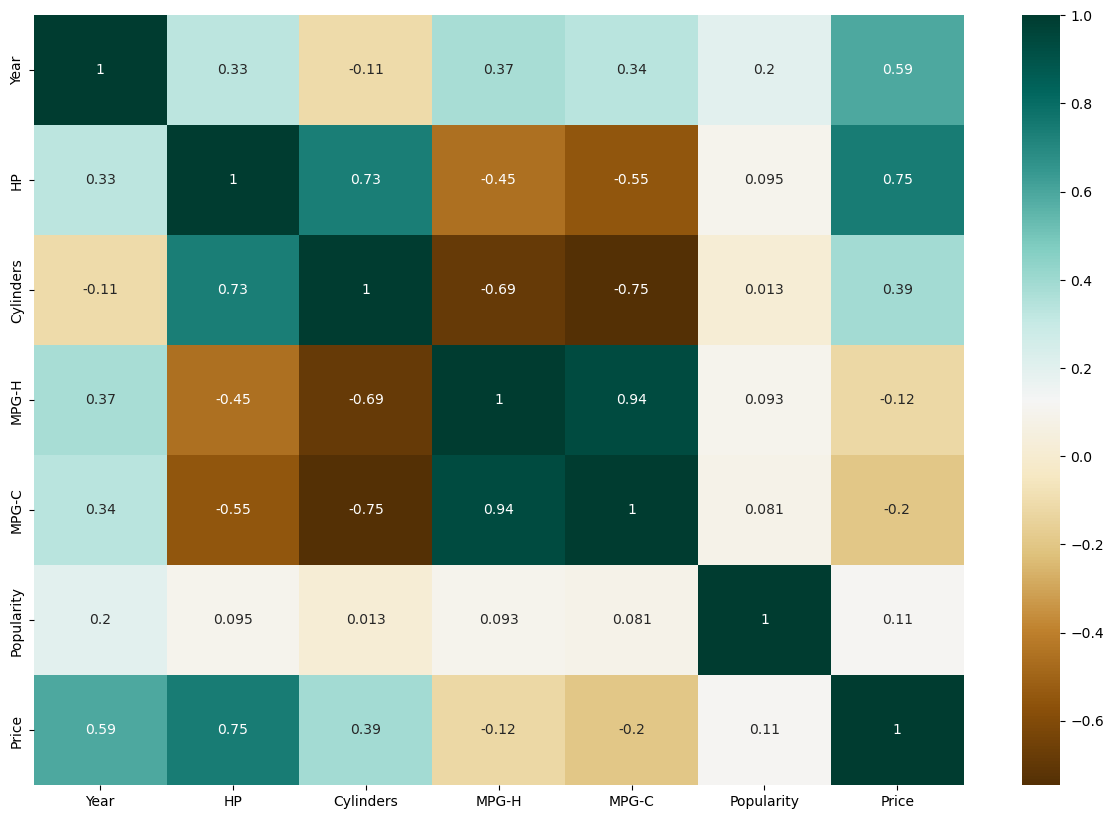

In [37]:
#Plotting Correlation Matrix
plt.figure(figsize=(15,10))
corrMatrix = df.corr()
sns.heatmap(corrMatrix,cmap="BrBG", annot=True)

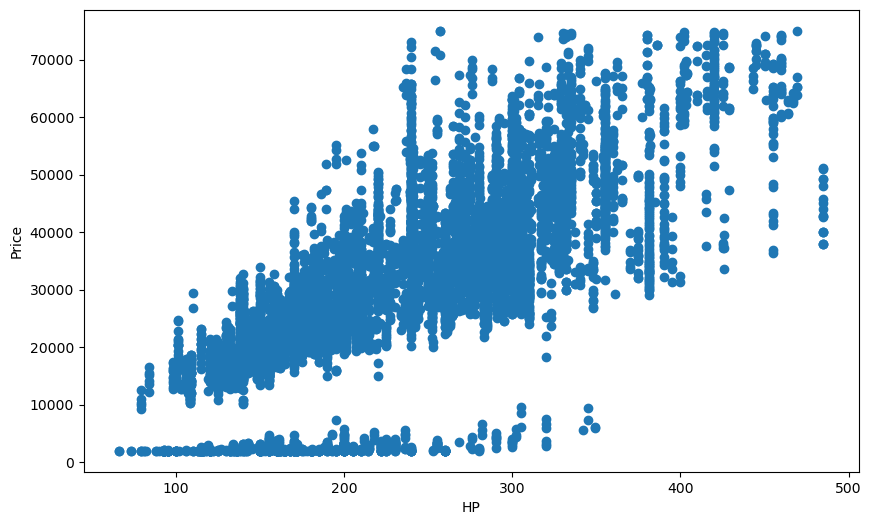

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

<AxesSubplot:xlabel='Cylinders', ylabel='Price'>

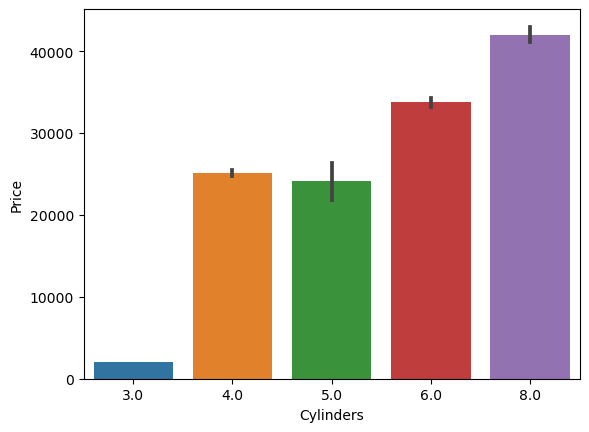

In [39]:
sns.barplot(df['Cylinders'],df['Price'])

<AxesSubplot:xlabel='HP', ylabel='Price'>

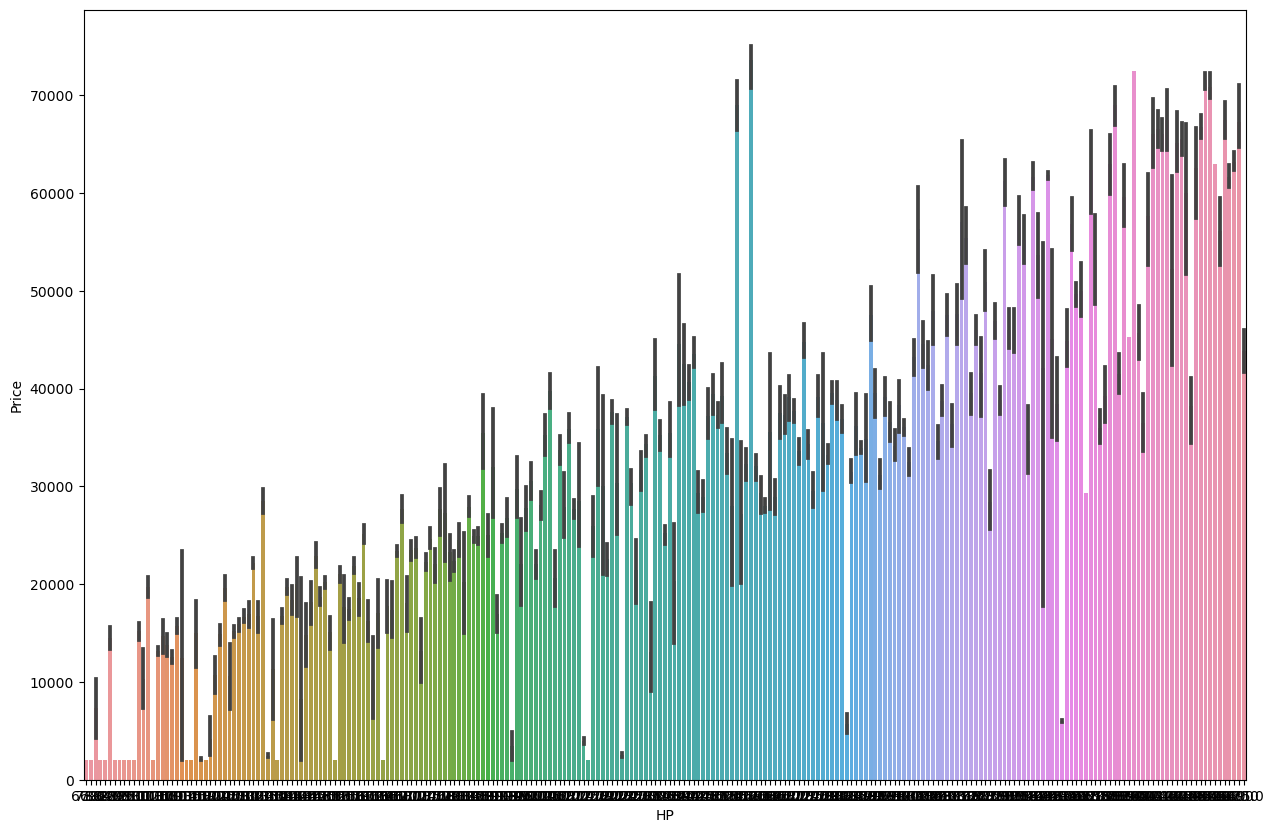

In [40]:
plt.figure(figsize=(15,10))
sns.barplot(df['HP'],df['Price'])
     

<AxesSubplot:xlabel='MPG-C', ylabel='Price'>

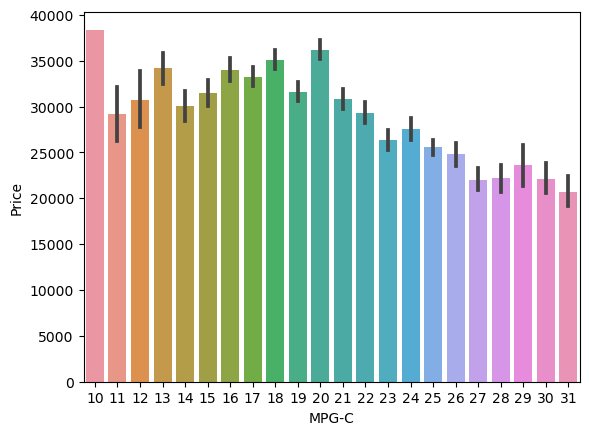

In [41]:
sns.barplot(df['MPG-C'],df['Price'])

<AxesSubplot:xlabel='MPG-H', ylabel='Price'>

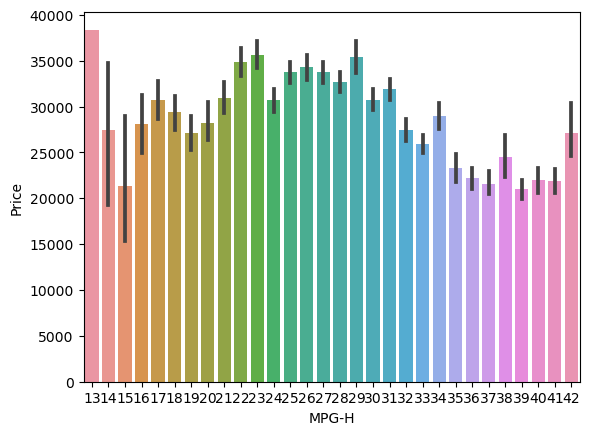

In [42]:
sns.barplot(df['MPG-H'],df['Price'])

<AxesSubplot:xlabel='Popularity', ylabel='Price'>

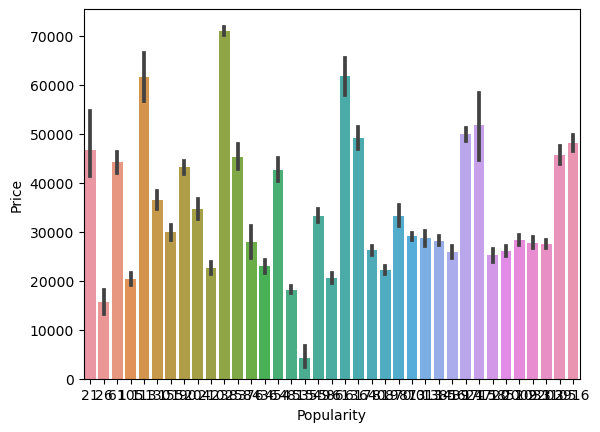

In [43]:

sns.barplot(df['Popularity'],df['Price'])

<AxesSubplot:xlabel='Make', ylabel='Price'>

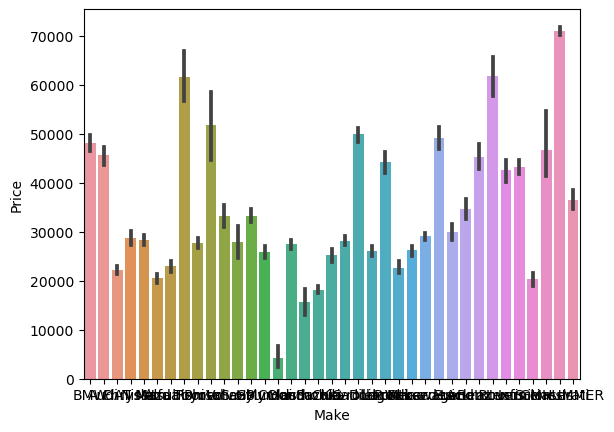

In [44]:
sns.barplot(df['Make'],df['Price'])

Text(0.5, 0, 'Make')

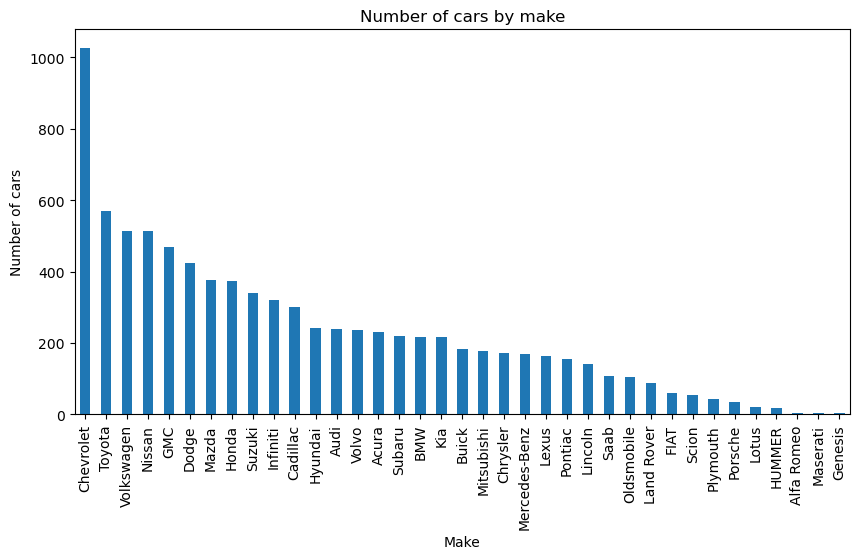

In [45]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Number of cars by make')
plt.ylabel('Number of cars')
plt.xlabel('Make')

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


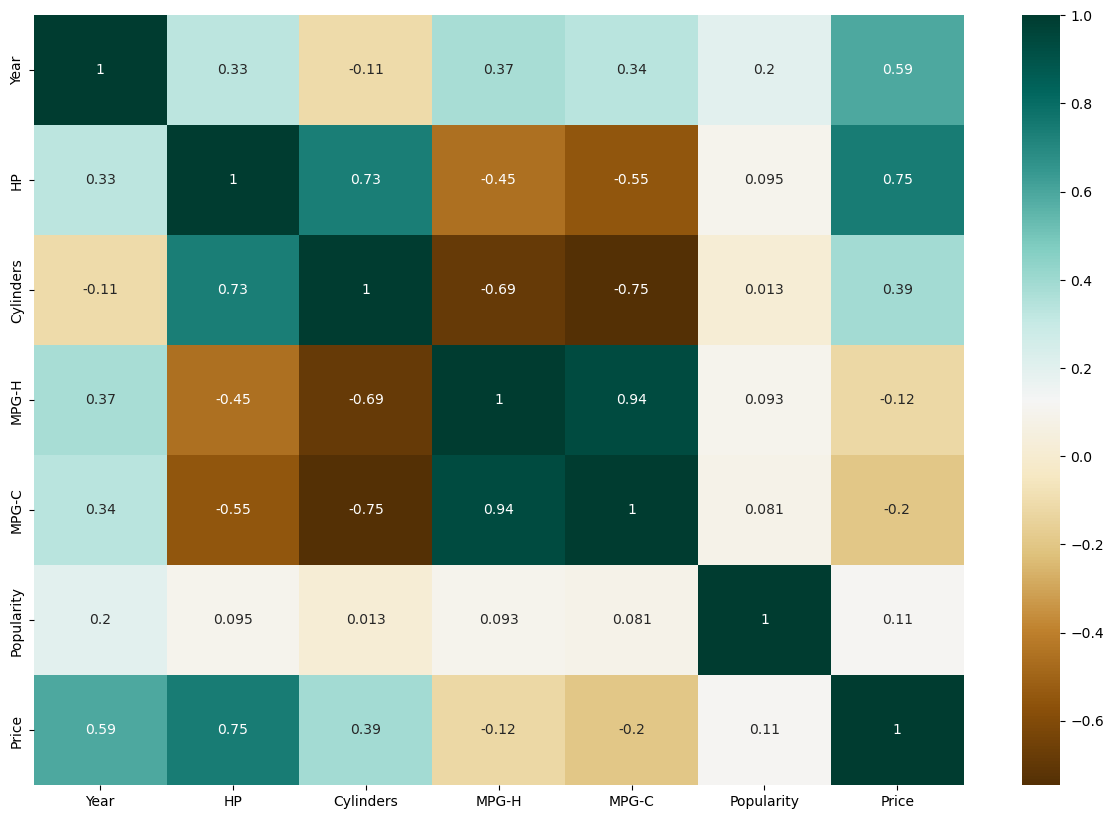

In [46]:
plt.figure(figsize=(15,10))
carc= df.corr()
sns.heatmap(carc,cmap='BrBG',annot=True)
carc
     



In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8546 entries, 0 to 11913
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           8546 non-null   object 
 1   Model          8546 non-null   object 
 2   Year           8546 non-null   int64  
 3   HP             8546 non-null   float64
 4   Cylinders      8546 non-null   float64
 5   Transmission   8546 non-null   object 
 6   Drive Mode     8546 non-null   object 
 7   Vehicle Size   8546 non-null   object 
 8   Vehicle Style  8546 non-null   object 
 9   MPG-H          8546 non-null   int64  
 10  MPG-C          8546 non-null   int64  
 11  Popularity     8546 non-null   int64  
 12  Price          8546 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 934.7+ KB


## encoding

In [48]:
cat_features = ['Make', 'Model', 'Transmission', 'Drive Mode', 'Vehicle Size', 'Vehicle Style']
df= pd.get_dummies(df, columns = cat_features)

In [49]:
df

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price,Make_Acura,Make_Alfa Romeo,Make_Audi,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,26,19,3916,46135,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,28,19,3916,40650,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,28,20,3916,36350,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,28,18,3916,29450,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,28,18,3916,34500,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,23,16,204,46120,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11910,2012,300.0,6.0,23,16,204,56670,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11911,2012,300.0,6.0,23,16,204,50620,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11912,2013,300.0,6.0,23,16,204,50920,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8546 entries, 0 to 11913
Columns: 717 entries, Year to Vehicle Style_Wagon
dtypes: float64(2), int64(5), uint8(710)
memory usage: 6.3 MB


### splitting to feature and target

In [51]:
x = df.drop('Price', axis = 1)
y = df['Price']


In [52]:
x

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Make_Acura,Make_Alfa Romeo,Make_Audi,Make_BMW,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,26,19,3916,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,28,19,3916,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,28,20,3916,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,28,18,3916,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,28,18,3916,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,23,16,204,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11910,2012,300.0,6.0,23,16,204,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11911,2012,300.0,6.0,23,16,204,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11912,2013,300.0,6.0,23,16,204,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
y

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: Price, Length: 8546, dtype: int64

### spliting for training and testing

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

In [55]:
x_train.shape

(6409, 716)

In [56]:
y_train.shape

(6409,)

### standardizing

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### Modeling

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

import math
from sklearn.metrics import r2_score, mean_squared_error

In [59]:
rfr = RandomForestRegressor(n_estimators = 40)
rfr_algo = make_pipeline(rfr)

rfr_algo.fit(x_train, y_train)
rfr_pred = rfr_algo.predict(x_test)

print('R2 Score is : ', r2_score(y_test, rfr_pred))
print('Mean squared error is : ', math.sqrt(mean_squared_error(y_test, rfr_pred)))

R2 Score is :  0.9484216555832842
Mean squared error is :  3475.5267961773516


### Fine tuning

#### Random Search

In [60]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

In [61]:
from sklearn.model_selection import  RandomizedSearchCV, train_test_split
random_search = RandomizedSearchCV(rfr, param_distributions=param_grid, cv=5, scoring='r2', n_iter=10, random_state=42)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_estimators=40),
                   param_distributions={'max_depth': [None, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='r2')

In [62]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

In [63]:
y_pred = best_model.predict(x_test)
r2 = r2_score(y_test,rfr_pred)
print("R-squared score:", r2)

R-squared score: 0.9484216555832842


### Let's visualise our model's performace to see how it worked

<AxesSubplot:xlabel='Price', ylabel='Predicted Value'>

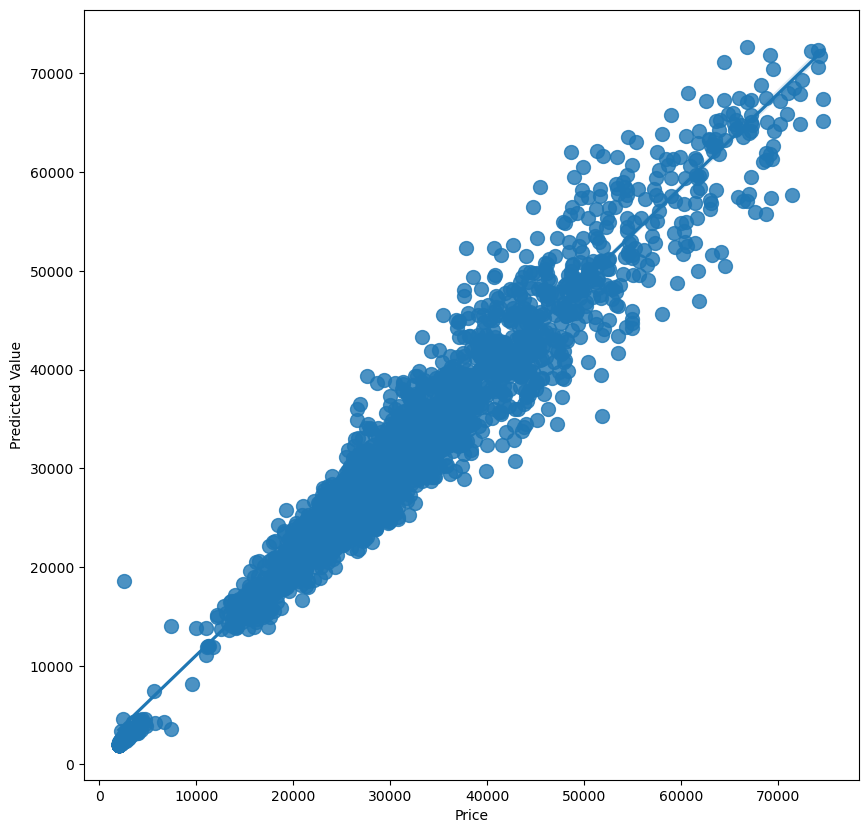

In [64]:
plt.figure(figsize=(10,10))
plt.ylabel("Predicted Value")
sns.regplot(y_test, rfr_pred, fit_reg=True, scatter_kws={"s": 100})

### Conclusion

The model performed really well with the r2 score of 0.948.
The mean square error is  3475.